# Import Libraries, Functions, and dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd drive/MyDrive/ENGG_680_Project/Database/

/content/drive/MyDrive/ENGG_680_Project/Database


In [3]:
!ls

 catboost_info					   'SS CFST Database_Finalised.xlsx'
'SS CFST Database_Finalised_for correlation.xlsx'  'SS CFST Database.xlsx'


In [4]:
#importing libraries and linear regression from scikit learn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import GridSearchCV

#Loading database
df = pd.read_excel("SS CFST Database_Finalised_for correlation.xlsx")
df_circ = pd.read_excel("SS CFST Database_Finalised_for correlation.xlsx", sheet_name=2)

# Rectangular Random Forest Regressor Hyperparameters

In [28]:
# Define X (features) and y (target)
X = df.drop(columns=['N_Test'])
y = df['N_Test']

#printing shape to confirm number of features and values
print(X.shape)
print(y.shape)

(211, 10)
(211,)


In [29]:
# Split the data into training and test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(random_state=42))
])

In [31]:
param_grid = {
    'rf__n_estimators': [100, 200, 300],        # Number of trees
    'rf__max_depth': [None, 10, 20, 30],        # Max depth of trees
    'rf__min_samples_split': [2, 5, 10],        # Min samples to split a node
    'rf__min_samples_leaf': [1, 2, 4],          # Min samples at a leaf node
    'rf__max_features': [None, 'sqrt', 'log2'], # Valid options for max_features
    'scaler': [StandardScaler(), RobustScaler(), None]          # Use StandardScaler, RobustScaler or None
}

In [32]:
# Apply GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='r2',                      # rank based on R squared value
    cv=3,                              # 3-fold cross-validation
    verbose=2,                         # Print progress
    n_jobs=-1                          # Use all CPU cores
)

In [33]:
# Fit GridSearchCV
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 972 candidates, totalling 2916 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [None, 10, 20, 30],
                         'rf__max_features': [None, 'sqrt', 'log2'],
                         'rf__min_samples_leaf': [1, 2, 4],
                         'rf__min_samples_split': [2, 5, 10],
                         'rf__n_estimators': [100, 200, 300],
                         'scaler': [StandardScaler(), RobustScaler(), None]},
             scoring='r2', verbose=2)

In [36]:
# Define MAPE calculation function
def mean_absolute_percentage_error(y_true, y_pred):
    epsilon = np.finfo(np.float64).eps
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

best_pipeline = grid_search.best_estimator_
# Predictions on training and test sets
y_train_pred = best_pipeline.predict(X_train)
y_test_pred = best_pipeline.predict(X_test)

# Training set metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)

# Test set metrics
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

# Output the best parameters and best score
print("Best Parameters:", grid_search.best_params_)

# Display results
print("Training Set Metrics:")
print(f"  MSE: {train_mse:.2f}")
print(f"  R^2: {train_r2:.2f}")
print(f"  MAPE: {train_mape:.2f}%")

print("\nTest Set Metrics:")
print(f"  MSE: {test_mse:.2f}")
print(f"  R^2: {test_r2:.2f}")
print(f"  MAPE: {test_mape:.2f}%")

Best Parameters: {'rf__max_depth': None, 'rf__max_features': None, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 300, 'scaler': StandardScaler()}
Training Set Metrics:
  MSE: 7147.17
  R^2: 0.99
  MAPE: 3.63%

Test Set Metrics:
  MSE: 69435.06
  R^2: 0.95
  MAPE: 8.29%


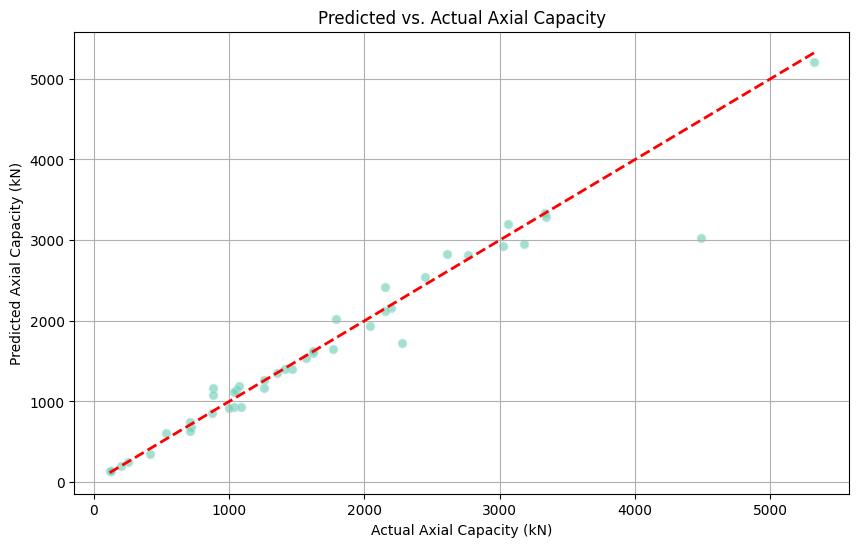

In [37]:
#Scatter Plot: Predicted vs. Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6, color='mediumaquamarine', edgecolors='powderblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Axial Capacity (kN)')
plt.ylabel('Predicted Axial Capacity (kN)')
plt.title('Predicted vs. Actual Axial Capacity')
plt.grid(True)
plt.show()

# Circular Random Forest Regressor Hyperparameter

In [17]:
# Define X (features) and y (target)
X = df_circ.drop(columns=['N_Test'])
y = df_circ['N_Test']

#printing shape to confirm number of features and values
print(X.shape)
print(y.shape)

(211, 9)
(211,)


In [18]:
# Split the data into training and test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(random_state=42))
])

In [20]:
param_grid = {
    'rf__n_estimators': [100, 200, 300],        # Number of trees
    'rf__max_depth': [None, 10, 20, 30],        # Max depth of trees
    'rf__min_samples_split': [2, 5, 10],        # Min samples to split a node
    'rf__min_samples_leaf': [1, 2, 4],          # Min samples at a leaf node
    'rf__max_features': [None, 'sqrt', 'log2'], # Valid options for max_features
    'scaler': [StandardScaler(), RobustScaler(), None]          # Use StandardScaler, RobustScaler or None
}

In [21]:
# Apply GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='r2',                      # rank based on R squared value
    cv=3,                              # 3-fold cross-validation
    verbose=2,                         # Print progress
    n_jobs=-1                          # Use all CPU cores
)

In [22]:
# Fit GridSearchCV
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 972 candidates, totalling 2916 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [None, 10, 20, 30],
                         'rf__max_features': [None, 'sqrt', 'log2'],
                         'rf__min_samples_leaf': [1, 2, 4],
                         'rf__min_samples_split': [2, 5, 10],
                         'rf__n_estimators': [100, 200, 300],
                         'scaler': [StandardScaler(), RobustScaler(), None]},
             scoring='r2', verbose=2)

In [23]:
# Define MAPE calculation function
def mean_absolute_percentage_error(y_true, y_pred):
    epsilon = np.finfo(np.float64).eps
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

best_pipeline = grid_search.best_estimator_
# Predictions on training and test sets
y_train_pred = best_pipeline.predict(X_train)
y_test_pred = best_pipeline.predict(X_test)

# Training set metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)

# Test set metrics
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

# Output the best parameters and best score
print("Best Parameters:", grid_search.best_params_)

# Display results
print("Training Set Metrics:")
print(f"  MSE: {train_mse:.2f}")
print(f"  R^2: {train_r2:.2f}")
print(f"  MAPE: {train_mape:.2f}%")

print("\nTest Set Metrics:")
print(f"  MSE: {test_mse:.2f}")
print(f"  R^2: {test_r2:.2f}")
print(f"  MAPE: {test_mape:.2f}%")

Best Parameters: {'rf__max_depth': None, 'rf__max_features': None, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 300, 'scaler': None}
Training Set Metrics:
  MSE: 23811.85
  R^2: 1.00
  MAPE: 6.45%

Test Set Metrics:
  MSE: 35306.28
  R^2: 0.99
  MAPE: 12.67%


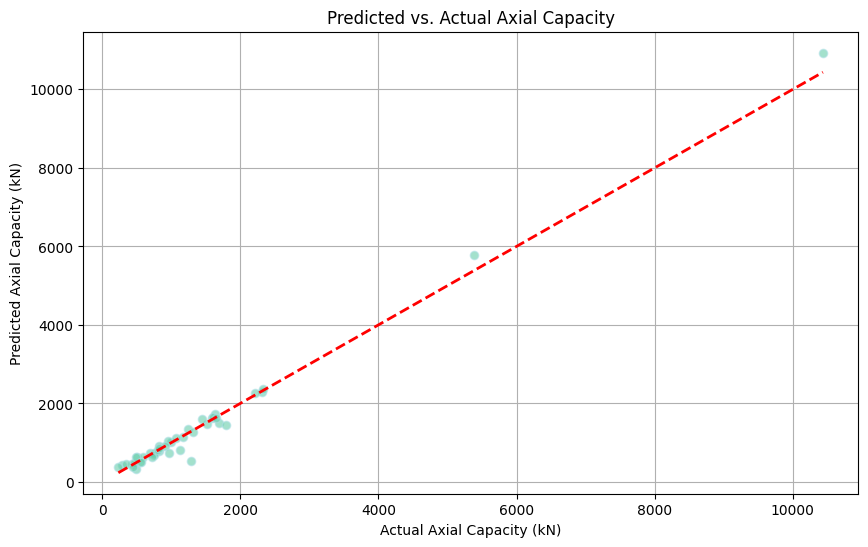

In [26]:
# Scatter Plot: Predicted vs. Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6, color='mediumaquamarine', edgecolors='powderblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Axial Capacity (kN)')
plt.ylabel('Predicted Axial Capacity (kN)')
plt.title('Predicted vs. Actual Axial Capacity')
plt.grid(True)
plt.show()